In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm


In [2]:
df = pd.read_csv('Data/data_ready.csv')
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True )
df.head()

,date,open,high,low,close,volume,ticker,days_post_ipo,first_day_open,first_day_high,...,^IXIC_low,^IXIC_close,^IXIC_adjclose,^IXIC_volume,^NYA_open,^NYA_high,^NYA_low,^NYA_close,^NYA_adjclose,^NYA_volume
0,2022-06-03,3.500,3.500,2.220,2.560,1629900.0,SVRE,0,3.50,3.500,...,11966.620117,12012.730469,12012.730469,4117290000,15960.530273,15960.530273,15764.839844,15797.169922,15797.169922,3107080000
1,1997-01-31,12.250,12.375,12.000,12.125,1241000.0,CERS,0,12.25,12.375,...,1374.979980,1379.849976,1379.849976,679190000,4356.169922,4356.169922,4356.169922,4356.169922,4356.169922,0
2,1997-02-03,12.375,12.375,12.125,12.250,179700.0,CERS,3,12.25,12.375,...,1374.569946,1376.050049,1376.050049,537540000,4361.450195,4361.450195,4361.450195,4361.450195,4361.450195,0
3,1997-02-04,12.250,12.375,12.000,12.000,113200.0,CERS,4,12.25,12.375,...,1362.810059,1373.750000,1373.750000,606160000,4370.549805,4370.549805,4370.549805,4370.549805,4370.549805,0
4,1997-02-05,12.000,12.375,12.000,12.000,236100.0,CERS,5,12.25,12.375,...,1339.640015,1348.439941,1348.439941,680460000,4321.910156,4321.910156,4321.910156,4321.910156,4321.910156,0


In [43]:
# len(df)
df.describe()

,open,high,low,close,volume,days_post_ipo,first_day_open,first_day_high,first_day_low,first_day_close,...,^IXIC_low,^IXIC_close,^IXIC_adjclose,^IXIC_volume,^NYA_open,^NYA_high,^NYA_low,^NYA_close,^NYA_adjclose,^NYA_volume
count,5.344620e+05,5.344620e+05,5.344620e+05,5.344620e+05,5.344620e+05,535838.000000,5.358380e+05,5.358380e+05,5.358380e+05,5.358380e+05,...,535838.000000,535838.000000,535838.000000,5.358380e+05,535838.000000,535838.000000,535838.000000,535838.000000,535838.000000,5.358380e+05
mean,5.593683e+04,6.210335e+04,5.104309e+04,5.593601e+04,7.357674e+05,138.332597,3.767126e+04,3.846939e+04,3.332920e+04,3.767060e+04,...,7928.303738,7992.174454,7992.174454,3.038237e+09,12030.598901,12091.717575,11964.328631,12031.556701,12031.556701,3.316611e+09
std,3.602113e+06,4.064362e+06,3.262801e+06,3.602113e+06,5.169728e+06,82.375879,1.884790e+06,1.924470e+06,1.666551e+06,1.884790e+06,...,4966.438939,5007.805076,5007.805076,1.633396e+09,3717.894984,3743.208229,3691.693044,3718.354114,3718.354114,1.420513e+09
min,4.000000e-03,4.000000e-03,4.000000e-03,4.000000e-03,0.000000e+00,0.000000,1.142800e-02,1.142800e-02,1.142800e-02,1.142800e-02,...,1108.489990,1114.109985,1114.109985,1.494100e+08,4118.149902,4118.149902,4118.149902,4118.149902,4118.149902,0.000000e+00
25%,9.960000e+00,9.999923e+00,9.930000e+00,9.969000e+00,1.280000e+04,68.000000,1.005000e+01,1.016000e+01,1.000000e+01,1.005000e+01,...,2950.379883,2967.790039,2967.790039,1.819190e+09,9003.379883,9058.440430,8939.990234,8999.200195,8999.200195,2.833290e+09
50%,1.426000e+01,1.465000e+01,1.390000e+01,1.425000e+01,8.359750e+04,137.000000,1.512000e+01,1.635000e+01,1.425000e+01,1.506000e+01,...,7036.180176,7108.399902,7108.399902,2.243420e+09,12222.990234,12315.139648,12147.669922,12222.389648,12222.389648,3.427120e+09
75%,2.477000e+01,2.539000e+01,2.411000e+01,2.475000e+01,3.190000e+05,208.000000,2.325000e+01,2.526000e+01,2.200000e+01,2.400000e+01,...,13414.139648,13582.419922,13582.419922,4.376800e+09,16121.610352,16278.099609,15991.839844,16121.610352,16121.610352,4.010770e+09
max,6.500000e+08,8.500000e+08,4.812000e+08,6.500000e+08,7.084860e+08,369.000000,9.500000e+07,9.700000e+07,8.400000e+07,9.500000e+07,...,16017.230469,16057.440430,16057.440430,1.110216e+10,17353.759766,17442.539062,17285.550781,17353.759766,17353.759766,1.145623e+10


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534462 entries, 0 to 535837
Data columns (total 99 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   date                                    534462 non-null  object 
 1   open                                    534462 non-null  float64
 2   high                                    534462 non-null  float64
 3   low                                     534462 non-null  float64
 4   close                                   534462 non-null  float64
 5   volume                                  534462 non-null  float64
 6   ticker                                  534462 non-null  object 
 7   days_post_ipo                           534462 non-null  int64  
 8   first_day_open                          534462 non-null  float64
 9   first_day_high                          534462 non-null  float64
 10  first_day_low                           5344

In [54]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'ticker',
       'days_post_ipo', 'first_day_open', 'first_day_high', 'first_day_low',
       'first_day_close', 'first_day_volume', 'Employees', 'Offer amount',
       'Shares Over Alloted', 'Total Offering Expense',
       'Shareholder Shares Offered', 'Shares Outstanding', 'Revenue',
       'first_filing_type', 'first_filing_date', 'Net Income', 'Total Assets',
       'Total Liabilities', 'Stockholders' Equity', 'proposedSharePrice',
       'sharesOffered', 'dollarValueOfSharesOffered', 'Utilities',
       'Technology', 'Services', 'Real Estate', 'Industrials', 'Healthcare',
       'Financial Services', 'Energy', 'Consumer Defensive',
       'Consumer Cyclical', 'Communication Services', 'Basic Materials',
       'Shell Companies', 'Biotechnology', 'Software—Application',
       'Banks—Regional', 'Software—Infrastructure', 'Medical Devices',
       'Drug Manufacturers—Specialty & Generic',
       'Internet Content & Informatio

In [3]:
df = df[~df.close.isna()]

cols = ['Utilities',
       'Technology', 'Services', 'Real Estate', 'Industrials', 'Healthcare',
       'Financial Services', 'Energy', 'Consumer Defensive',
       'Consumer Cyclical', 'Communication Services', 'Basic Materials',
       'Shell Companies', 'Biotechnology', 'Software—Application',
       'Banks—Regional', 'Software—Infrastructure', 'Medical Devices',
       'Drug Manufacturers—Specialty & Generic',
       'Internet Content & Information', 'Internet Retail',
       'Health Information Services', 'Diagnostics & Research',
       'Semiconductors', 'Education & Training Services', 'Asset Management',
       'Oil & Gas Midstream', 'Credit Services',
       'Medical Instruments & Supplies', 'Oil & Gas E&P',
       'Information Technology Services', 'Communication Equipment', 'country',
       'continent', 'Asia', 'North America', 'Europe', 'Africa',
       'South America', 'Oceania']
for col in cols:
    df[col] = (df[col] == 1) * 1

cols = ['Revenue', 'Total Offering Expense', 'Net Income', 'Shares Outstanding', 'Total Liabilities',
        'sharesOffered','proposedSharePrice', 'Total Assets', "Stockholders' Equity",'first_filing_type',
        'first_filing_date', 'Employees', 'Offer amount', 'Shares Over Alloted', 'dollarValueOfSharesOffered']
for col in cols:
        df[col].fillna(0, inplace=True)

df[df.country.isna()].country = 'Missing'
df['Shareholder Shares Offered'] = df['Shareholder Shares Offered'].isna() * 1


In [73]:
# df.isna().sum(axis = 0).sort_values(ascending=False)[:-20]

In [5]:
columns = ['open', 'high', 'low', 'close', 'volume', 'ticker',
       'days_post_ipo', 'first_day_open', 'first_day_high', 'first_day_low',
       'first_day_close', 'first_day_volume', 'Employees', 'Offer amount',
       'Shares Over Alloted', 'Total Offering Expense',
       'Shareholder Shares Offered', 'Shares Outstanding', 'Revenue',
        'first_filing_date', 'Net Income', 'Total Assets',
       'Total Liabilities', "Stockholders' Equity", 'proposedSharePrice',
       'sharesOffered', 'dollarValueOfSharesOffered','^DJI_open', '^DJI_high', '^DJI_low',
       '^DJI_close', '^DJI_adjclose', '^DJI_volume', '^GSPC_open',
       '^GSPC_high', '^GSPC_low', '^GSPC_close', '^GSPC_adjclose',
       '^GSPC_volume', '^RUT_open', '^RUT_high', '^RUT_low', '^RUT_close',
       '^RUT_adjclose', '^RUT_volume', '^IXIC_open', '^IXIC_high', '^IXIC_low',
       '^IXIC_close', '^IXIC_adjclose', '^IXIC_volume', '^NYA_open',
       '^NYA_high', '^NYA_low', '^NYA_close', '^NYA_adjclose', '^NYA_volume']

In [56]:
cols = ['high', 'close', 'open', 'low', 'Shares Outstanding', 'first_day_open', 'first_day_close', 
        'first_day_high', 'first_day_low', 'volume', 'Revenue', 'dollarValueOfSharesOffered',
        'Offer amount', 'Total Liabilities', 'Total Assets', 'Net Income', 'Employees', 
        'first_day_volume', "Stockholders' Equity", 'Shares Over Alloted', 'sharesOffered', 
        'proposedSharePrice', 'Total Offering Expense']
for col in cols:
    df[col] = np.log(df[col] + 1e-10)
# df[cols].describe().loc['min']
# df['high'] = np.log(df.volume)

#Negative Skew after log
# cols = ['sharesOffered', 'Offer amount', 'dollarValueOfSharesOffered', 'proposedSharePrice']

/home/patrick/anaconda3/envs/regression/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [57]:
df[columns].skew(skipna=True).sort_values(ascending=False)

/tmp/ipykernel_4194/3584631951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[columns].skew(skipna=True).sort_values(ascending=False)


^IXIC_volume                   0.875981
^DJI_volume                    0.564781
Shares Outstanding             0.297765
^IXIC_low                      0.242914
^IXIC_open                     0.242304
^IXIC_adjclose                 0.241731
^IXIC_close                    0.241731
^IXIC_high                     0.240719
^GSPC_volume                   0.216262
^RUT_volume                    0.194343
^GSPC_high                     0.150248
^GSPC_open                     0.149613
^GSPC_close                    0.149385
^GSPC_adjclose                 0.149385
^GSPC_low                      0.148619
days_post_ipo                  0.114196
Shares Over Alloted            0.000000
^DJI_low                      -0.036393
^DJI_open                     -0.036523
^DJI_adjclose                 -0.036579
^DJI_close                    -0.036579
^DJI_high                     -0.036592
^RUT_high                     -0.050536
^RUT_open                     -0.051949
^RUT_close                    -0.052416


In [58]:
pair_cols = ['close', '^GSPC_close', 'Offer amount',
            'dollarValueOfSharesOffered','Total Assets', "Stockholders' Equity"]

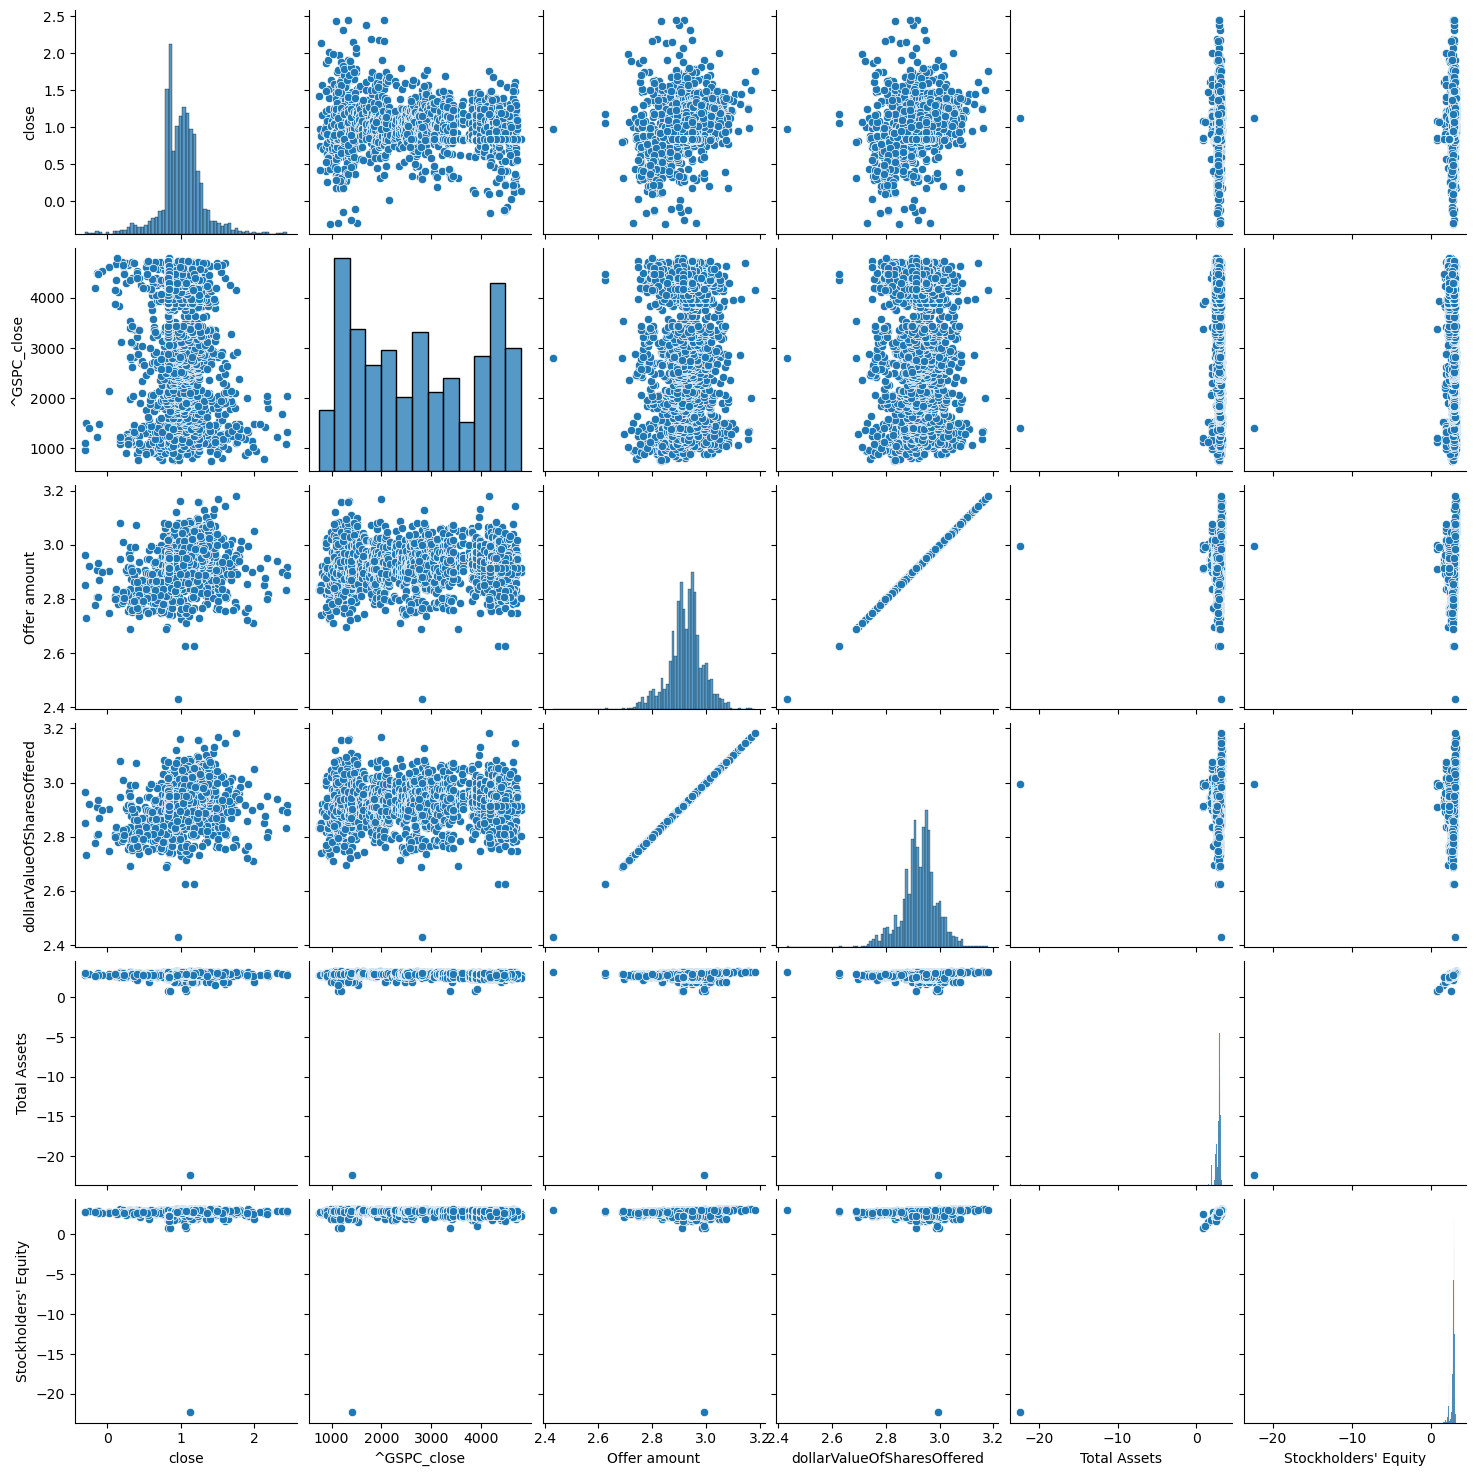

In [59]:
sns.pairplot(df[(df.days_post_ipo == 5) & (df.close <= 15) & (((df.close - df.close.mean()) / df.close.std()) >= -2)][pair_cols])


In [19]:
df[(df.days_post_ipo >= 5) & (df.days_post_ipo <= 15)][columns]

,open,high,low,close,volume,ticker,days_post_ipo,first_day_open,first_day_high,first_day_low,...,^IXIC_low,^IXIC_close,^IXIC_adjclose,^IXIC_volume,^NYA_open,^NYA_high,^NYA_low,^NYA_close,^NYA_adjclose,^NYA_volume
4,12.00,12.375,12.000,12.000,236100.0,CERS,5,12.25,12.375,12.00,...,1339.640015,1348.439941,1348.439941,680460000,4321.910156,4321.910156,4321.910156,4321.910156,4321.910156,0
5,12.00,12.250,12.000,12.000,191600.0,CERS,6,12.25,12.375,12.00,...,1340.540039,1346.400024,1346.400024,623490000,4334.069824,4334.069824,4334.069824,4334.069824,4334.069824,0
6,12.00,12.125,10.625,11.750,103200.0,CERS,7,12.25,12.375,12.00,...,1346.290039,1357.709961,1357.709961,644310000,4375.410156,4375.410156,4375.410156,4375.410156,4375.410156,0
7,11.50,11.875,11.500,11.500,45900.0,CERS,10,12.25,12.375,12.00,...,1335.339966,1335.339966,1335.339966,629500000,4360.080078,4360.080078,4360.080078,4360.080078,4360.080078,0
8,11.50,11.750,9.875,10.125,91100.0,CERS,11,12.25,12.375,12.00,...,1319.689941,1331.510010,1331.510010,650980000,4378.479980,4378.479980,4378.479980,4378.479980,4378.479980,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535819,15.76,15.860,14.550,14.750,216300.0,BLTE,10,12.50,17.500,9.64,...,11574.940430,11623.250000,11623.250000,5911380000,15566.559570,15566.559570,15005.950195,15057.870117,15057.870117,4746120000
535820,14.76,15.399,14.500,14.650,112700.0,BLTE,11,12.50,17.500,9.64,...,11566.280273,11737.669922,11737.669922,6199090000,15057.870117,15286.400391,14855.599609,15025.740234,15025.740234,4630150000
535821,14.50,14.510,13.000,13.500,173400.0,BLTE,12,12.50,17.500,9.64,...,11339.179688,11364.240234,11364.240234,6120860000,15025.740234,15290.629883,14887.639648,14902.139648,14902.139648,4683220000
535822,13.40,13.800,13.010,13.640,180600.0,BLTE,13,12.50,17.500,9.64,...,11108.759766,11370.959961,11370.959961,6647400000,14902.139648,15007.169922,14695.690430,14931.099609,14931.099609,4964130000


In [51]:
for col in cols:

    print(f'{col}:\t{(((df[col] - df[col].mean()) / df[col].std()) <=-3).sum()}')
    

high:	2560
close:	2585
open:	2600
low:	2643
Shares Outstanding:	16372
first_day_open:	3094
first_day_close:	3031
first_day_high:	2839
first_day_low:	3286
volume:	35745
Revenue:	0
dollarValueOfSharesOffered:	850
Offer amount:	850
Total Liabilities:	16534
Total Assets:	5642
Net Income:	21080
Employees:	25706
first_day_volume:	15981
Stockholders' Equity:	7315
Shares Over Alloted:	0
sharesOffered:	3373
proposedSharePrice:	3792
Total Offering Expense:	10317


In [2]:


cols = ['Shares Outstanding', 'first_day_open', 'first_day_close', 
        'first_day_high', 'first_day_low', 'volume', 'Revenue', 'dollarValueOfSharesOffered',
        'Offer amount', 'Total Liabilities', 'Total Assets', 'Net Income', 'Employees', 
        'first_day_volume', "Stockholders' Equity", 'Shares Over Alloted', 'sharesOffered', 
        'proposedSharePrice', 'Total Offering Expense']
for col in cols:
    print(f'{col}:\t{len(df[df[col] > 5].ticker.unique())}')

NameError: name 'df' is not defined

In [60]:
print((df[(((df.close - df.close.mean()) / df.close.std()) >= -2)].corr()['open'].sort_values(ascending=False).to_string()))

open                                      1.000000
high                                      0.998481
low                                       0.998438
close                                     0.998251
first_day_open                            0.801973
first_day_close                           0.799583
first_day_high                            0.798765
first_day_low                             0.786060
proposedSharePrice                        0.273686
Offer amount                              0.273553
dollarValueOfSharesOffered                0.273552
Total Offering Expense                    0.235705
Total Liabilities                         0.232426
Net Income                                0.217528
Shares Outstanding                        0.147986
Employees                                 0.122563
sharesOffered                             0.119819
Revenue                                   0.102730
Energy                                    0.081869
Technology                     

In [21]:
df.to_csv('Data/data_ready.csv')